# Spam Detection/Classification with Logistic Regression and Random Forest Models

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

Create and compare two models on this data: a Logistic Regression, and a Random Forests Classifier. 



Review of strengths/weaknesses:

Logistic Regression: 
+ Cannot be applied to non-linear classification problems.  Requires good signal to noise ratio.  
- Colinearity and outliers tamper with the accuracy of the LR model.  

Random Forest: 
+ Doesn't require pre-processing of data.  It handles co-linearity efficiently.
- However, it is susceptible to overfitting and prone to outliers.  It can lose information while handling continous variables.

Prediction:
I think it's possible that many Features will be colinear and that Random Forest will handle those better.  

Linear Regression will overfit if we do not assess/remove the colinearity.

Interim goals:
Graphing the data and checking colinearity would help to determine which model might be best suited for this dataset.


In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


## Split the Data into Training and Testing Sets

In [4]:
# Create the labels set `y` and features DataFrame `X`
y = df['spam']
X = df.drop(columns='spam')
display(y.head())
display(X.head())

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [5]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [6]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
X_scaler = StandardScaler()
# Fit the Standard Scaler with the training data 
X_scaler.fit(X_train)

# Scale the TRAINING DATA and TEST DATA SEPARATELY with the Transform Function
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [8]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 1)
lr_model.fit(X_train_scaled, y_train)

# Check fit of training data...
print(f"Log Reg Training Data Score: {lr_model.score(X_train_scaled, y_train):.4f}")


Log Reg Training Data Score: 0.9296


In [9]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_preds = lr_model.predict(X_test_scaled)

# Review the predictions
y_preds[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [10]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
# y_test is 'y_actual'
acc_score = accuracy_score(y_preds, y_test)
print(f'Log Reg accuracy_score: {acc_score:.4f}')

# Should be the same as... 
print(f"Log Reg model.score(): {lr_model.score(X_test_scaled, y_test):.4f}")

Log Reg accuracy_score: 0.9279
Log Reg model.score(): 0.9279


In [11]:
# Creating and viewing DataFrames of predictions: 

# TRAINING
# Apply the fitted/trained model to the TRAINING dataset
training_predictions = lr_model.predict(X_train)

# Save predictions (+ actual y_train values) to a DataFrame
train_results_df = pd.DataFrame({"Training Prediction": training_predictions, 
                           "Training Actual Targets": y_train})


# TESTING
# Make and save TRAINING predictions with the saved logistic regression model using the test data
# Apply the fitted model to the `test` dataset
testing_predictions = lr_model.predict(X_test)

# Save test predictions and actual test values to a DataFrame
test_results_df = pd.DataFrame({
                        "Testing Predictions": testing_predictions, 
                        "Testing Actual Targets": y_test})


# Review predictions, test values DataFrame
display(train_results_df.head())
display(test_results_df.head())

c:\Users\black\anaconda3\envs\dev\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\black\anaconda3\envs\dev\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Training Prediction,Training Actual Targets
4576,1,0
4401,1,0
3707,1,0
2362,1,0
1537,1,1


,Testing Predictions,Testing Actual Targets
1351,1,1
1687,1,1
1297,1,1
2101,1,0
3920,1,0


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [12]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rfc = RandomForestClassifier(random_state=1, n_estimators=500). \
                    fit(X_train_scaled, y_train)


# Evaluate the Training model
print(f'Random Forest Training Score: {rfc.score(X_train_scaled, y_train):.4f}')


Random Forest Training Score: 0.9997


In [13]:
# Make and save testing predictions with the saved Random Forest Classifier ? using the test data

y_preds_2 = rfc.predict(X_test_scaled)

# Review the predictions
y_preds_2[:10]


array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [14]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
# y_test is 'y_actual'
rfc_acc_score = accuracy_score(y_preds_2, y_test)
print(f'RForest accuracy_score: {rfc_acc_score:.4f}')

# Should be the same as... 
print(f"RForest model.score(): {rfc.score(X_test_scaled, y_test):.4f}")

RForest accuracy_score: 0.9652
RForest model.score(): 0.9652


In [15]:
# Get the feature importance array
feature_importances = rfc.feature_importances_

importances_sorted = sorted(zip(feature_importances, 
						X.columns), reverse=True)
importances_sorted[:10]

[(0.12192112814008209, 'char_freq_!'),
 (0.09533933570058972, 'char_freq_$'),
 (0.07158337229698059, 'word_freq_free'),
 (0.06923901267709875, 'word_freq_remove'),
 (0.06811104369368015, 'capital_run_length_average'),
 (0.05579496385525832, 'capital_run_length_longest'),
 (0.0533025421651241, 'word_freq_your'),
 (0.045464200536752736, 'capital_run_length_total'),
 (0.03860171446883917, 'word_freq_hp'),
 (0.03164392902362354, 'word_freq_money')]

Text(0.5, 1.0, 'Top Feature Importances for Spam Detection')

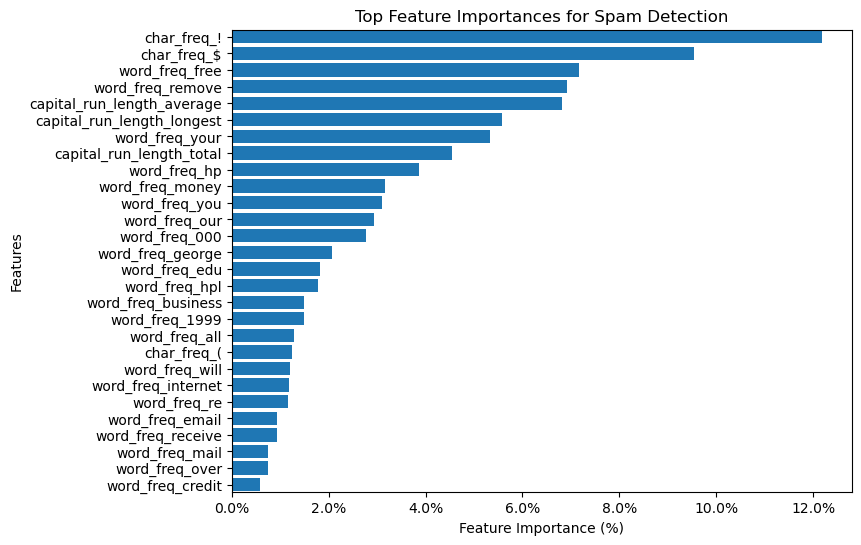

In [30]:
# Plot the feature importances
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1], reverse=True)
top_feats = features[:28]

cols = [f[0] for f in top_feats][::-1]  # Reverse the order of features
width = [f[1]*100 for f in top_feats][::-1]  # Reverse the order of importances, get in %
# cols = [f[0] for f in features]
# width = [f[1] for f in features]

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

# Set the X-axis to percentage format
ax.xaxis.set_major_formatter(mticker.PercentFormatter())
ax.set_xlabel('Feature Importance (%)')
ax.set_ylabel('Features')
plt.title('Top Feature Importances for Spam Detection')



## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

In [151]:

print(f"Log Reg Training Data Score: {lr_model.score(X_train_scaled, y_train):.4f}")
print(f'Log Reg accuracy_score: {acc_score:.4f}')
print()
print(f'Random Forest Training Score: {rfc.score(X_train_scaled, y_train):.4f}')
print(f'Random Forest accuracy_score: {rfc_acc_score:.4f}')

Log Reg Training Data Score: 0.9296
Log Reg accuracy_score: 0.9279

Random Forest Training Score: 0.9997
Random Forest accuracy_score: 0.9652


* **Logistic Regression** training score: 0.9296
* **Logistic Regression** accuracy_score: 0.9279

* **Random Forest Classifier** training score: 0.9997
* **Random Forest Classifier** accuracy_score: 0.9652

**Results:**

Random Forest Classification has a higher accuracy, but the Training Score suggests this model is highly over-fit.  **The Logistic Regression model is a 'better' model even though it's accuracy is lower.**

My prediction was "I think it's possible that many Features will be colinear and that Random Forest will handle those better."  This was not correct. However, the models did behave as expected:

* I thought that Logistic Regression might struggle with non-linear problems, but this one appears to be fairly linear, without too many outliers.
* I mentioned that Random Forest might struggle with overfitting, and I believe that is the case here and the more dominating effect.

**Final thoughts:**

Reviewing the Random Forest Graph with 'feature_importances', I found it interesting that some of the biggest predictors of 'spam' are the frequency of ! and $ characters, as well as the words: free, remove, your, hp(?), and money.  

This focus on money-related terms, as well as seeming 'demands' ("Your xyz needs attention ....") is expected, but interesting to see
statistically. 

```
[(0.12192112814008209, 'char_freq_!'),
 (0.09533933570058972, 'char_freq_$'),
 (0.07158337229698059, 'word_freq_free'),
 (0.06923901267709875, 'word_freq_remove'),
 (0.06811104369368015, 'capital_run_length_average'),
 (0.05579496385525832, 'capital_run_length_longest'),
 (0.0533025421651241, 'word_freq_your'),
 (0.045464200536752736, 'capital_run_length_total'),
 (0.03860171446883917, 'word_freq_hp'),
 (0.03164392902362354, 'word_freq_money')]


```

